## 0. Environment setup for this notebook

In [1]:
%matplotlib inline
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py

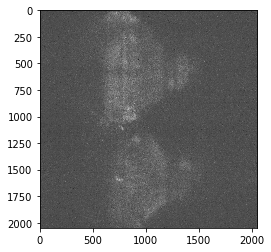

In [7]:
h5f = h5py.File('pixelwiseDenoising/testing_file/TM0000000_CM0_CHN00.h5', 'r')
imgStack = h5f['default'] # z, x, y
plt.imshow(imgStack[0], cmap='gray')
plt.show()

## 1. Preprocessing of raw imaging

From image stack to volumetric data

### 1.0 Set up parallel processing on local or remote machine

### 1.1 Pixel-wise denoising

A simplified version of NCS, which removes the hot spot in sCMOS and correct the image according to the gain.

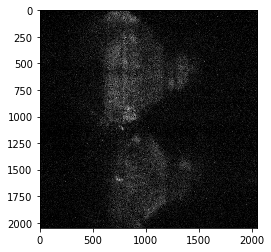

In [6]:
from pixelwiseDenoising.simpleDenioseTool import simpleDN
gain = np.load('pixelwiseDenoising/gainMat20180208/gain_mat.npy')
offset = np.load('pixelwiseDenoising/gainMat20180208/offset_mat.npy')
imgD = simpleDN(imgStack[0], gain=gain, offset=offset)
plt.imshow(imgD, cmap='gray')
plt.show()

## 2. Image registration

### 2.0 Regitration to a single fish

### 2.1 Registration to multiple fish

### 2.2 Registration to brain atlas

## 3. 